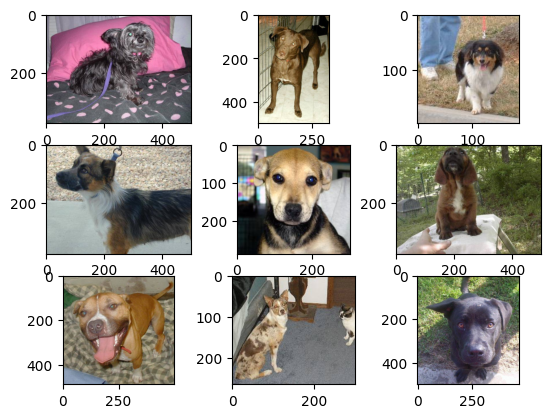

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# define location dataset name: ./train/
folder = 'train/'

# plot first few images
for i in range(9):
    # define suplot
    plt.subplot(330+1+i)
    # define filename
    filename = folder + "dog." +str(i)+".jpg"
    # load image pixel
    image = imread(filename)
    # plot raw pixels data
    plt.imshow(image)
plt.show()

### Show image is dog.

### show imageexemple is cat

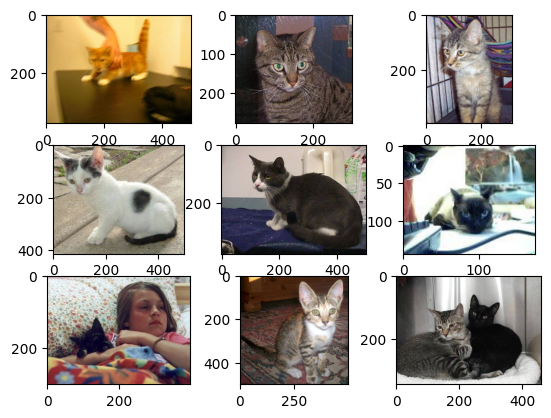

In [7]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# define location dataset name: ./train/
folder = 'train/'

# plot first few images
for i in range(9):
    # define suplot
    plt.subplot(330+1+i)
    # define filename
    filename = folder + "cat." +str(i)+".jpg"
    # load image pixel
    image = imread(filename)
    # plot raw pixels data
    plt.imshow(image)
plt.show()

### Kích thước ảnh trước khi xử lý (Tùy chọn)

Nếu chúng tôi muốn tải tất cả các hình ảnh vào bộ nhớ, chúng tôi có thể ước tính rằng nó sẽ cần khoảng 12 gigabyte RAM.

Đó là 25.000 hình ảnh với mỗi pixel 200x200x3 hoặc 3.000.000.000 giá trị pixel 32 bit.

Chúng tôi có thể tải tất cả các hình ảnh, định hình lại chúng và lưu trữ chúng dưới dạng một mảng NumPy duy nhất. Điều này có thể phù hợp với RAM trên nhiều máy hiện đại, nhưng không phải tất cả, đặc biệt nếu bạn chỉ có 8 gigabyte để làm việc.

Chúng tôi có thể viết mã tùy chỉnh để tải hình ảnh vào bộ nhớ và thay đổi kích thước chúng như một phần của quá trình tải, sau đó lưu chúng sẵn sàng để lập mô hình.

Ví dụ dưới đây sử dụng API xử lý ảnh Keras để tải tất cả 25.000 ảnh trong tập dữ liệu đào tạo và định hình lại chúng thành ảnh vuông 200×200. Nhãn cũng được xác định cho từng ảnh dựa trên tên tệp. Một bộ ảnh và nhãn sau đó được lưu. 

In [8]:
# khong kha thi

[]


### Ngoài ra, chúng ta có thể tải hình ảnh dần dần bằng cách sử dụng lớp Keras ImageDataGenerator và API flow_from_directory() . Điều này sẽ chậm hơn để thực thi nhưng sẽ chạy trên nhiều máy hơn. 

In [20]:
from os import makedirs


# creat directoris
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    
    # creat label subdirectories (Tao thu muc con)
    labeldirs = ['dogs/','cats/']
    for labldir in labeldirs:

        newdir = dataset_home+subdir+labldir
        makedirs(newdir,exist_ok=True)



### Creat folder use to training 

In [23]:
# seed random number generator
from random import seed
from random import random
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from shutil import copyfile


seed(1)

# define ratio(phan tram) of pictures to use for validation
val_ratio = 0.25

# copy training datasets images into subdiretories
src_directory = 'train/'

for file in listdir(src_directory):

    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/' + file
        copyfile(src,dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/' +file
        copyfile(src,dst)

    

### Build model is source with vgg

In [1]:
import sys
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator



def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3)))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))

    # optimizer
    opt = SGD(lr=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

    return model

# define_model
model = define_model()
model.summary()


2023-08-08 20:39:37.104670: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-08 20:39:37.138951: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 20:39:37.433507: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 20:39:37.436362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 20:39:38.693527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

### ImageDataGenerator 

In [7]:


# creat data Grnerator
datagen = ImageDataGenerator(rescale=1.0/255.0,
 width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterators (Chuan bi vong lap)
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(200,200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',class_mode='binary', batch_size=64, target_size=(200,200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [7]:
#fit model
history = model.fit(train_it, steps_per_epoch=len(test_it), validation_data=test_it, validation_steps=len(test_it),epochs=20, verbose=1)

Epoch 1/20
99/99 [==============================] - 105s 1s/step - loss: 0.7094 - accuracy: 0.5736 - val_loss: 0.6430 - val_accuracy: 0.6294
Epoch 2/20
99/99 [==============================] - 101s 1s/step - loss: 0.6192 - accuracy: 0.6467 - val_loss: 0.6001 - val_accuracy: 0.6708
Epoch 3/20
99/99 [==============================] - 93s 945ms/step - loss: 0.5778 - accuracy: 0.6905 - val_loss: 0.5647 - val_accuracy: 0.7143
Epoch 4/20
99/99 [==============================] - 92s 925ms/step - loss: 0.5487 - accuracy: 0.7180 - val_loss: 0.5455 - val_accuracy: 0.7165
Epoch 5/20
99/99 [==============================] - 91s 921ms/step - loss: 0.5416 - accuracy: 0.7290 - val_loss: 0.5440 - val_accuracy: 0.7209
Epoch 6/20
99/99 [==============================] - 92s 935ms/step - loss: 0.5052 - accuracy: 0.7547 - val_loss: 0.5078 - val_accuracy: 0.7466
Epoch 7/20
99/99 [==============================] - 91s 925ms/step - loss: 0.4960 - accuracy: 0.7548 - val_loss: 0.5166 - val_accuracy: 0.7392
Epo

In [8]:
model.save("model.h5")

/home/hoai2k4/Github/my_tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# evalutate  model
acc = model.evaluate(test_it)
print("ACCURACY: {}".format(acc))

99/99 [==============================] - 26s 257ms/step - loss: 0.5309 - accuracy: 0.7983
ACCURACY: [0.5309062600135803, 0.7983499765396118]


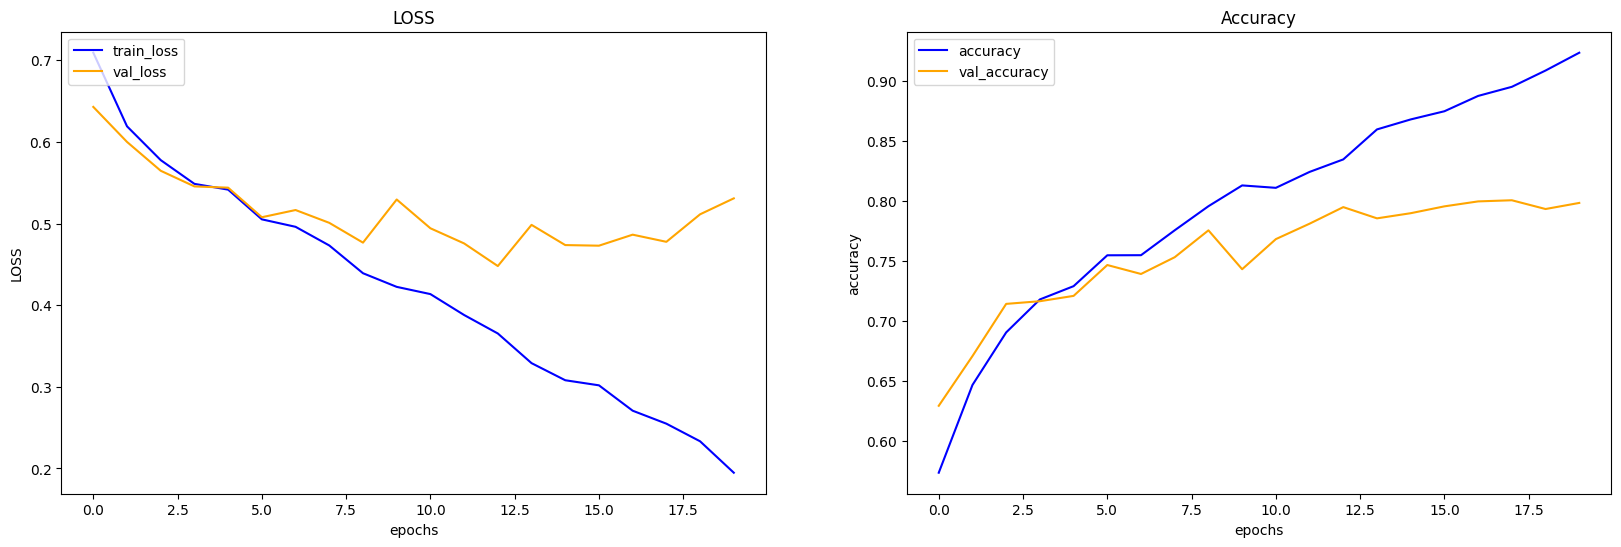

In [10]:
def summarize_diagnostics():
    # plt loss
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title('LOSS')
    plt.plot(history.history['loss'],color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.ylabel('LOSS')
    plt.xlabel("epochs")
    plt.legend(['train_loss', 'val_loss'],loc='upper left')

    # plot accuracy
    plt.subplot(1,2,2)
    plt.title('Accuracy')
    plt.plot(history.history["accuracy"],color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.ylabel('accuracy')
    plt.xlabel("epochs")
    plt.legend(['accuracy', 'val_accuracy'],loc='upper left')
    plt.show()
summarize_diagnostics()

1/1 [==============================] - 0s 20ms/step
0.9995507


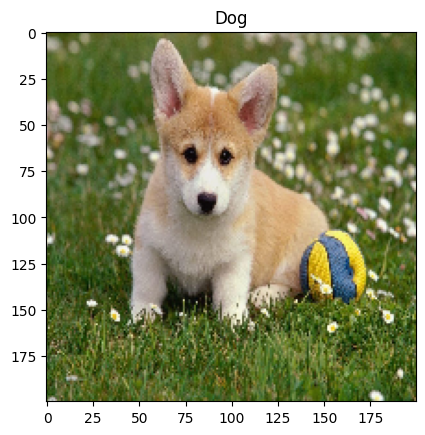

In [41]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
from tensorflow.image import resize
from tensorflow.keras.models import load_model
import numpy as np

load_model1 = load_model('model.h5')

Cat_Nhi = load_img('conchotestne.jpg', target_size=(200,200))
x = img_to_array(Cat_Nhi)
x = np.expand_dims(x,axis=0)
x =  x/255.0
images = np.vstack([x])
classes = model.predict(images)
result = classes[0][0]
print(result)

convat  = "Dog"
if result <0.5:
    convat = "Cat"
plt.title(convat)
plt.imshow(Cat_Nhi)



### Explore Transfer Learning

#### using vgg16

In [2]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# defint model
def define_model():

    # load model
    model = VGG16(include_top=False, input_shape=(224,224,3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False

    # Add new classsifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1,activation='sigmoid')(class1)

    # define model new
    model = Model(inputs=model.inputs, outputs=output)

    # compile model
    opt = SGD(lr= 0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = define_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:


# creat data Grnerator
datagen = ImageDataGenerator(rescale=1.0/255.0,
 width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterators (Chuan bi vong lap)
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/', class_mode='binary', batch_size=64, target_size=(200,200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',class_mode='binary', batch_size=64, target_size=(200,200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [ ]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)